# 1. Functions

## 1.1 Function to plot dual axis plots

In [352]:
import matplotlib.pyplot as plt

def plot_dual_axis(ax, x, param1, xlabel='X-axis', param2=None):
    color1 = 'tab:blue'
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Delay', color=color1)
    ax.plot(x, param1, 'o-', color=color1, label='Delay')
    ax.tick_params(axis='y', labelcolor=color1)

    if param2 is not None:
        color2 = 'tab:red'
        ax2 = ax.twinx()  # Create a second axis sharing the x-axis
        ax2.set_ylabel('Leakage', color=color2)
        ax2.plot(x, param2, 'o--', color=color2, label='Leakage')
        ax2.tick_params(axis='y', labelcolor=color2)

        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

## 1.2 Function to generate list of point to plot

In [353]:
def generate_points_within_range(start, end):
    step = (end - start) / 4
    points = [start + i * step for i in range(5)]
    return points

## 1.3 Function to extract corresponsing delay and leakage

In [354]:
import pandas as pd
import numpy as np

def nearest_values_average(df, numbers, column_name, target_column):
    outputs = []
    for number in numbers:
        nearest_index = (df[column_name] - number).abs().idxmin()  # Find index of nearest value
        nearest_value = df.loc[nearest_index, column_name]  # Get the nearest value
        nearest_indices = df.index[df[column_name] == nearest_value]  # Get indices of all occurrences of nearest value
        average_value = df.loc[nearest_indices, target_column].mean()  # Calculate average of corresponding values in target column
        outputs.append(average_value)
    return outputs


# 2. Generating the range list for 16 nm

In [355]:
temp_range = [-55,125]
temp_list = generate_points_within_range(temp_range[0],temp_range[1])

In [356]:
pvdd_range = [0.63,0.77]
pvdd_list = generate_points_within_range(pvdd_range[0],pvdd_range[1])

In [357]:
cqload_range = [0.1,5]
cqload_list = generate_points_within_range(pvdd_range[0],pvdd_range[1])

In [358]:
parameters = {
    'toxe': 9.5e-010,
    'toxm': 9.5e-010,
    'toxref': 9.5e-010,
    'toxp_par': 7e-010,
    'xj': 5e-009,
    'ndep': 7e+018
}

# Ranges for each parameter
ranges = {
    'toxe': (0.9 * parameters['toxe'], 1.1 * parameters['toxe']),
    'toxm': (0.9 * parameters['toxm'], 1.1 * parameters['toxm']),
    'toxref': (0.9 * parameters['toxref'], 1.1 * parameters['toxref']),
    'toxp_par': (0.9 * parameters['toxp_par'], 1.1 * parameters['toxp_par']),
    'xj': (0.9 * parameters['xj'], 1.1 * parameters['xj']),
    'ndep': (0.9 * parameters['ndep'], 1.1 * parameters['ndep'])
}

# Generate points within the specified ranges for each parameter
toxe_list = generate_points_within_range(*ranges['toxe'])
toxm_list = generate_points_within_range(*ranges['toxm'])
toxref_list = generate_points_within_range(*ranges['toxref'])
toxp_par_list = generate_points_within_range(*ranges['toxp_par'])
xj_list = generate_points_within_range(*ranges['xj'])
ndep_list = generate_points_within_range(*ranges['ndep'])

# 3. INVERTER

Loading the File path

In [359]:
file_path = "INVERTER_leakage.csv"  # Provide the path to your CSV file
df_inverter_leakage = pd.read_csv(file_path)

In [360]:
file_path = "INVERTER_delay.csv"  # Provide the path to your CSV file
df_inverter_delay = pd.read_csv(file_path)

## 3.1 Temparature

In [361]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_inverter_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)

## Delay List
target_column = 'delay_nodea'
delay_list_temp = nearest_values_average(df_inverter_delay, temp_list, column_name,target_column)
print(delay_list_temp)

[1.351819755877982e-09, 2.223285566392798e-09, 6.574285776901227e-09, 1.4345860507961089e-08, 2.8274487482282543e-08]
[1.1308854999999999e-11, 1.5801740000000003e-11, 1.7879645e-11, 1.4074545e-11, 3.1193910000000007e-12]


## 3.2 Pvdd

In [362]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_inverter_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)

## Delay List
target_column = 'delay_nodea'
delay_list_pvdd = nearest_values_average(df_inverter_delay, pvdd_list, column_name,target_column)
print(delay_list_pvdd)

[5.208080376076745e-09, 3.6409238653020206e-09, 3.733612819285488e-09, 2.5998954513264728e-08, 1.5865662160711157e-08]
[2.1868675e-11, 1.228629e-11, 6.287123e-12, 8.8299765e-12, 1.4419855e-11]


## 3.3 Cqload

In [363]:
## Leakage List
column_name = 'Cqload'  # Specify the column name

## Delay List
target_column = 'delay_nodea'
delay_list_cqload = nearest_values_average(df_inverter_delay, cqload_list, column_name,target_column)
print(delay_list_cqload)

[6.110195e-12, 5.2625835e-12, 6.025912e-12, 4.1766985e-12, 5.2873335e-12]


## 3.4 toxe

In [364]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_inverter_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)

## Delay List
target_column = 'delay_nodea'
delay_list_toxe = nearest_values_average(df_inverter_delay, pvdd_list, column_name,target_column)
print(delay_list_toxe)

[9.856107289337358e-09, 1.0985303430961735e-08, 1.6036559058253702e-09, 1.8201428241132376e-08, 5.501150423540173e-09]
[8.5689685e-12, 8.5689685e-12, 8.5689685e-12, 8.5689685e-12, 8.5689685e-12]


## 3.5 toxm

In [365]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_inverter_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)

## Delay List
target_column = 'delay_nodea'
delay_list_toxm = nearest_values_average(df_inverter_delay, toxm_list, column_name,target_column)
print(delay_list_toxm)

[3.568164419750172e-09, 2.6796836468158646e-08, 9.384543737378836e-09, 9.005383838776416e-09, 1.193468475157966e-09]
[1.0626459e-11, 1.146479e-11, 1.956429e-11, 3.6117715e-12, 1.660839e-11]


## 3.6 toxref

In [366]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_inverter_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)

## Delay List
target_column = 'delay_nodea'
delay_list_toxref = nearest_values_average(df_inverter_delay, toxref_list, column_name,target_column)
print(delay_list_toxref)

[2.1548723308377692e-09, 5.373240460339245e-09, 8.922711956027266e-09, 7.448073943451952e-09, 7.310749348184985e-10]


[3.068198e-12, 1.6715065000000003e-11, 1.6574035e-11, 1.906229e-11, 3.266446e-12]


## 3.7 toxp

In [367]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_inverter_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)

## Delay List
target_column = 'delay_nodea'
delay_list_toxp = nearest_values_average(df_inverter_delay, toxp_par_list, column_name,target_column)
print(delay_list_toxp)

[1.4738320714732318e-09, 2.1829630262044795e-08, 2.324260752335023e-09, 6.020489155246885e-09, 1.539107516237605e-08]
[6.151316e-12, 1.4299955e-11, 1.163035e-11, 5.5283765e-12, 1.5540035e-11]


## 3.8 xj

In [368]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_inverter_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)

## Delay List
target_column = 'delay_nodea'
delay_list_xj = nearest_values_average(df_inverter_delay, xj_list, column_name,target_column)
print(delay_list_xj)

[1.3388302442781027e-09, 6.94275490312811e-10, 7.522621869649288e-09, 9.436980234903947e-09, 9.502123866358997e-09]
[1.8339225e-11, 1.149069e-11, 1.7752535e-11, 1.9324095e-11, 8.358286e-12]


## 3.9 ndep

In [369]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_inverter_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)

## Delay List
target_column = 'delay_nodea'
delay_list_ndep = nearest_values_average(df_inverter_delay, ndep_list, column_name,target_column)
print(delay_list_ndep)

[1.6173811117971452e-08, 1.1932319787643501e-09, 7.401696873823155e-10, 7.247468025761122e-09, 5.3899391603027225e-09]
[1.316107e-11, 2.9602700000000007e-12, 1.533465e-11, 2.2035305e-11, 1.415752e-11]


## 3.10 Plotting all plots

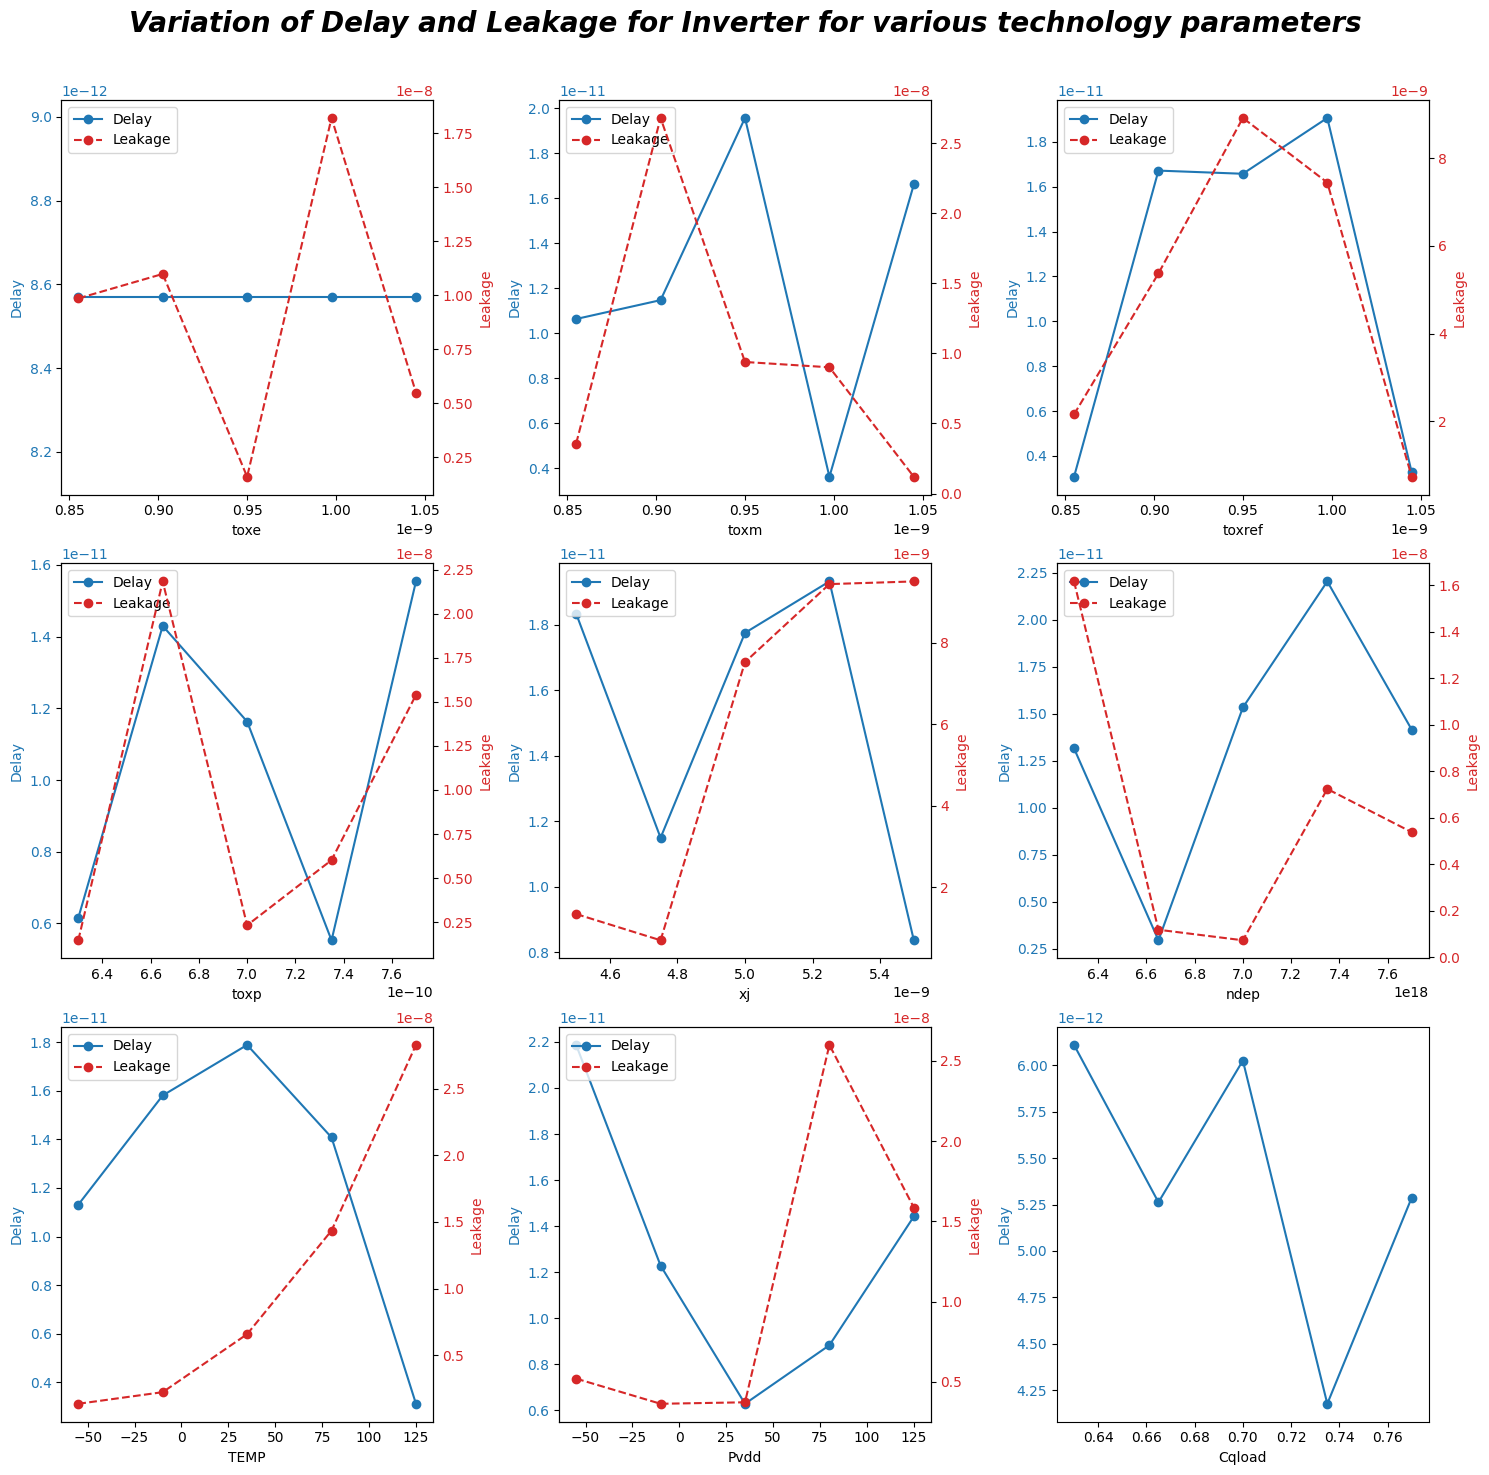

In [370]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data1 = [
    (axs[0, 0], toxe_list, delay_list_toxe, 'toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, delay_list_toxm, 'toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, delay_list_toxref, 'toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, delay_list_toxp, 'toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, delay_list_xj, 'xj', leakage_list_xj),
    (axs[1, 2], ndep_list, delay_list_ndep, 'ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, delay_list_temp, 'TEMP', leakage_list_temp),
    (axs[2, 1], temp_list, delay_list_pvdd, 'Pvdd', leakage_list_pvdd),
    (axs[2, 2], cqload_list, delay_list_cqload, 'Cqload', None)
]

for ax, x, param1, xlabel, param2 in data1:
    plot_dual_axis(ax, x, param1, xlabel, param2)

plt.tight_layout()
fig.suptitle('Variation of Delay and Leakage for Inverter for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.savefig('Plots/16_nm_HP_Inverter.png')
plt.show()


# 4. AND2

Loading the File path

In [371]:
file_path = "AND_2_leakage.csv"  # Provide the path to your CSV file
df_and2_leakage = pd.read_csv(file_path)

In [372]:
file_path = "AND_2_delay.csv"  # Provide the path to your CSV file
df_and2_delay = pd.read_csv(file_path)

## 4.1 Temparature

In [373]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_and2_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)

## Delay List
target_column = 'delay_nodea'
delay_list_temp = nearest_values_average(df_and2_delay, temp_list, column_name,target_column)
print(delay_list_temp)

[1.6566731247274547e-09, 7.64777291645136e-09, 2.26231179703594e-08, 4.863681707641056e-08, 9.581045852483931e-08]
[-4.82517705e-10, -4.7589648e-10, -4.7406418e-10, -4.795561950000001e-10, -4.90547284e-10]


## 4.2 Pvdd

In [374]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_and2_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)

## Delay List
target_column = 'delay_nodea'
delay_list_pvdd = nearest_values_average(df_and2_delay, pvdd_list, column_name,target_column)
print(delay_list_pvdd)

[1.8237973773915924e-08, 1.3432082159167255e-08, 1.2592253312088614e-08, 8.52924950819662e-08, 5.274276978910053e-08]
[-4.682114749999998e-10, -4.770930900000001e-10, -4.86504885e-10, -4.853610900000001e-10, -4.79840885e-10]


## 4.3 Cqload

In [375]:
## Leakage List
column_name = 'Cqload'  # Specify the column name

## Delay List
target_column = 'delay_nodea'
delay_list_cqload = nearest_values_average(df_and2_delay, cqload_list, column_name,target_column)
print(delay_list_cqload)

[-4.82821215e-10, -4.8549108e-10, -4.84202415e-10, -4.891073750000001e-10, -4.86578015e-10]


## 4.4 toxe

In [376]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_and2_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)

## Delay List
target_column = 'delay_nodea'
delay_list_toxe = nearest_values_average(df_and2_delay, pvdd_list, column_name,target_column)
print(delay_list_toxe)

[3.289270632318114e-08, 3.5540753848985535e-08, 5.828416715181504e-09, 6.13394177738162e-08, 1.852644270265761e-08]
[-4.83940915e-10, -4.83940915e-10, -4.83940915e-10, -4.83940915e-10, -4.83940915e-10]


## 4.5 toxm

In [377]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_and2_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)

## Delay List
target_column = 'delay_nodea'
delay_list_toxm = nearest_values_average(df_and2_delay, toxm_list, column_name,target_column)
print(delay_list_toxm)

[4.695003772756477e-09, 8.551298276072648e-08, 3.3252042202644644e-08, 3.0528187888941124e-08, 4.386330470956212e-09]
[-4.82825e-10, -4.84069615e-10, -4.7043708e-10, -4.88315515e-10, -4.72303395e-10]


## 4.6 toxref

In [378]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_and2_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)

## Delay List
target_column = 'delay_nodea'
delay_list_toxref = nearest_values_average(df_and2_delay, toxref_list, column_name,target_column)
print(delay_list_toxref)

[7.57226836717312e-09, 1.8198674478306547e-08, 3.307598496769742e-08, 2.6535330446557436e-08, 2.756614748939463e-09]
[-4.8845761e-10, -4.76181985e-10, -4.7241949e-10, -4.707551199999999e-10, -4.89476775e-10]


## 4.7 toxp

In [379]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_and2_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)

## Delay List
target_column = 'delay_nodea'
delay_list_toxp = nearest_values_average(df_and2_delay, toxp_par_list, column_name,target_column)
print(delay_list_toxp)

[5.655809033338381e-09, 7.192643089404698e-08, 8.069380506317003e-09, 2.112823958590431e-08, 5.166934921006374e-08]
[-4.848528099999998e-10, -4.8017051e-10, -4.7848171e-10, -4.8581362e-10, -4.78117885e-10]


## 4.8 xj

In [380]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_and2_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)

## Delay List
target_column = 'delay_nodea'
delay_list_xj = nearest_values_average(df_and2_delay, xj_list, column_name,target_column)
print(delay_list_xj)

[4.826212670307771e-09, 2.643407082467401e-09, 2.628434305571329e-08, 3.419675274948347e-08, 3.1875333004062604e-08]
[-4.7165949e-10, -4.807590150000001e-10, -4.73649115e-10, -4.695484799999998e-10, -4.84053095e-10]


## 4.9 ndep

In [381]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_and2_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)

## Delay List
target_column = 'delay_nodea'
delay_list_ndep = nearest_values_average(df_and2_delay, ndep_list, column_name,target_column)
print(delay_list_ndep)

[5.3561506596598724e-08, 4.283727760414721e-09, 2.81877142646437e-09, 2.563078591497589e-08, 1.941302262037233e-08]
[-4.80958285e-10, -4.8876358e-10, -4.725786999999998e-10, -4.67806805e-10, -4.76115695e-10]


## 4.10 Plotting all plots

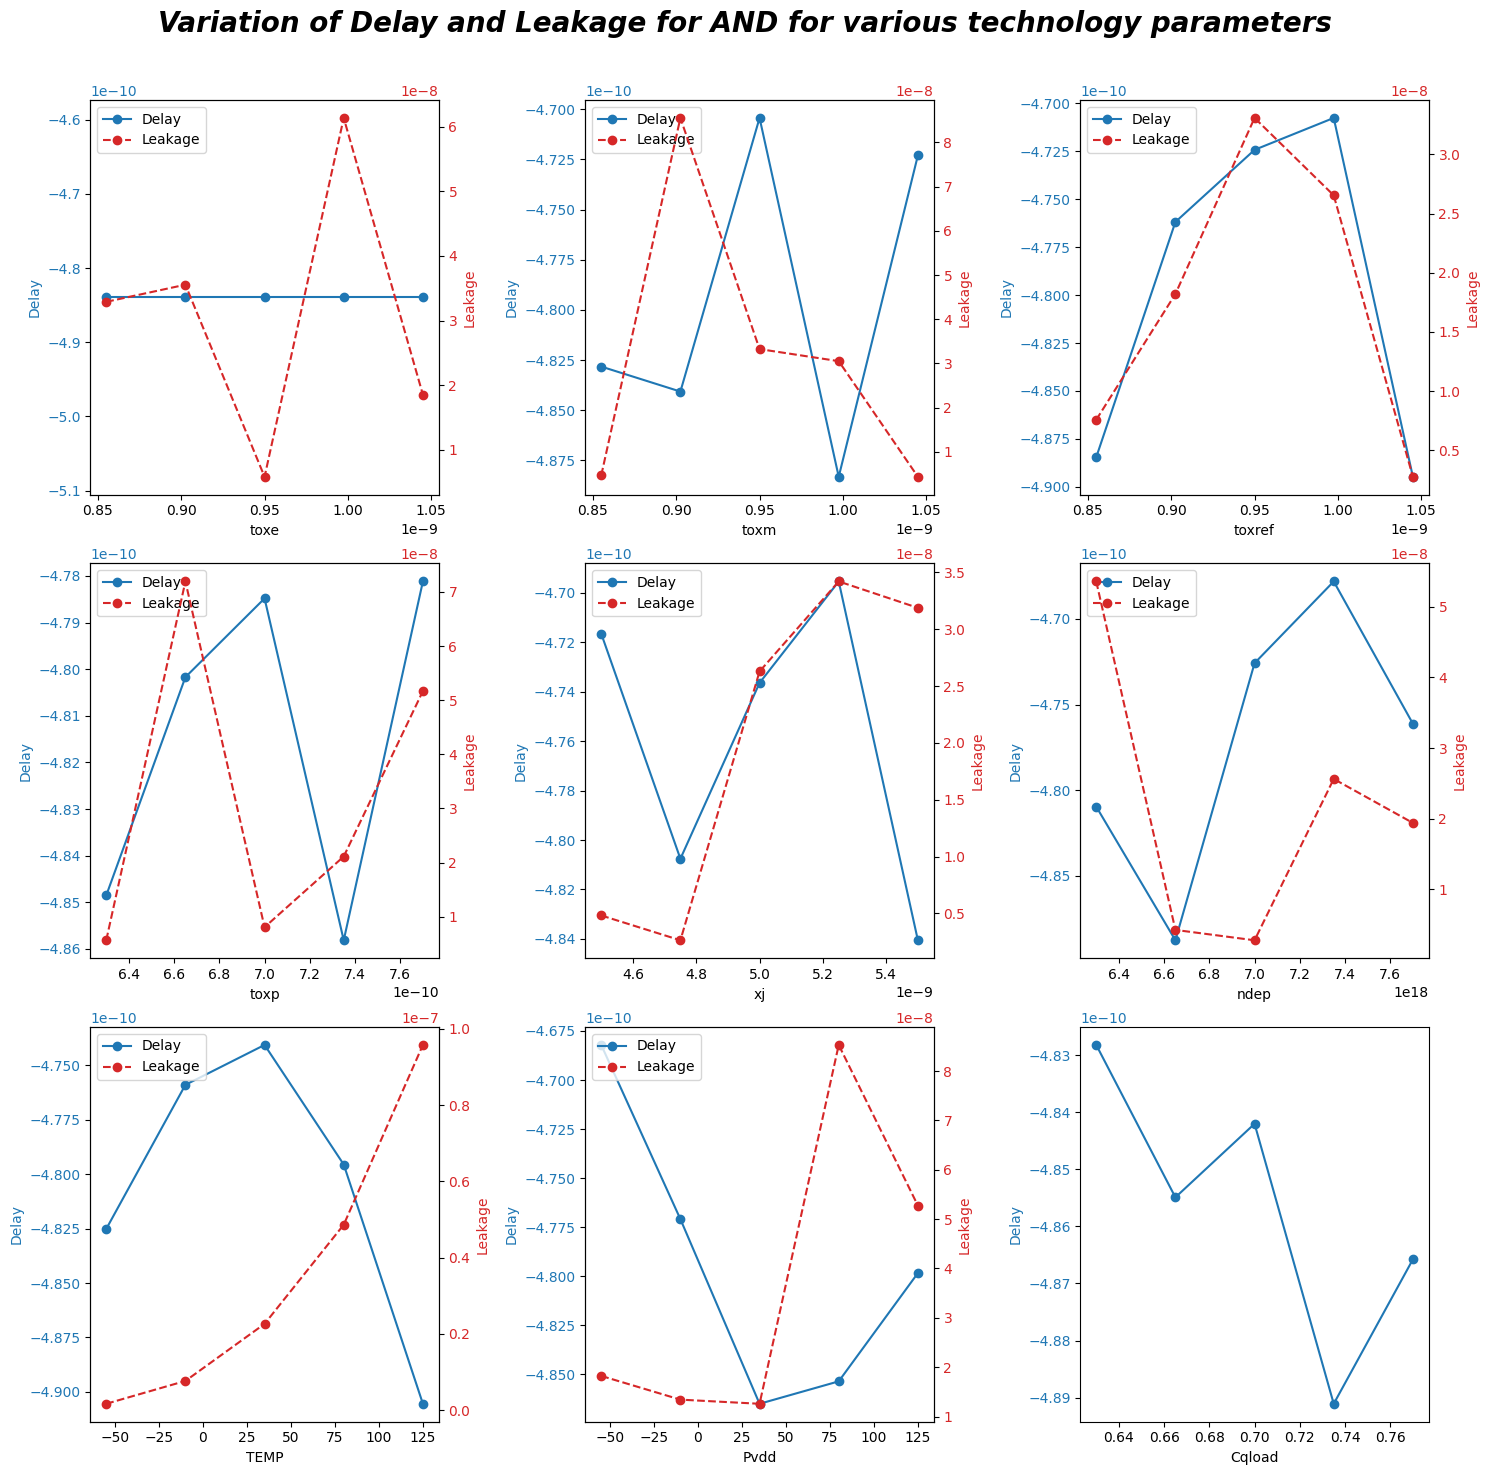

In [382]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data2 = [
    (axs[0, 0], toxe_list, delay_list_toxe, 'toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, delay_list_toxm, 'toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, delay_list_toxref, 'toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, delay_list_toxp, 'toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, delay_list_xj, 'xj', leakage_list_xj),
    (axs[1, 2], ndep_list, delay_list_ndep, 'ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, delay_list_temp, 'TEMP', leakage_list_temp),
    (axs[2, 1], temp_list, delay_list_pvdd, 'Pvdd', leakage_list_pvdd),
    (axs[2, 2], cqload_list, delay_list_cqload, 'Cqload', None)
]

for ax, x, param1, xlabel, param2 in data2:
    plot_dual_axis(ax, x, param1, xlabel, param2)

plt.tight_layout()
fig.suptitle('Variation of Delay and Leakage for AND for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.savefig('Plots/16_nm_HP_AND2.png')
plt.show()


# 5. AND3

Loading the File path

In [383]:
file_path = "AND_3_leakage.csv"  # Provide the path to your CSV file
df_and3_leakage = pd.read_csv(file_path)

In [384]:
file_path = "AND_3_delay.csv"  # Provide the path to your CSV file
df_and3_delay = pd.read_csv(file_path)

## 5.1 Temparature

In [385]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_and3_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)

## Delay List
target_column = 'delay_nodea'
delay_list_temp = nearest_values_average(df_and3_delay, temp_list, column_name,target_column)
print(delay_list_temp)

[1.809099809152191e-09, 3.2114638306090302e-09, 9.129631650801004e-09, 1.9368450002692734e-08, 3.8792731754619475e-08]
[-4.767517000000001e-10, -4.680419000000001e-10, -4.659864e-10, -4.73482885e-10, -4.85557415e-10]


## 5.2 Pvdd

In [386]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_and3_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)

## Delay List
target_column = 'delay_nodea'
delay_list_pvdd = nearest_values_average(df_and3_delay, pvdd_list, column_name,target_column)
print(delay_list_pvdd)

[7.340505465480099e-09, 4.807633806430923e-09, 5.3482749867231e-09, 3.738315860764078e-08, 2.197024842896495e-08]
[-4.5834999e-10, -4.6775818e-10, -4.802427100000001e-10, -4.799489199999998e-10, -4.7431838e-10]


## 5.3 Cqload

In [387]:
## Leakage List
column_name = 'Cqload'  # Specify the column name

## Delay List
target_column = 'delay_nodea'
delay_list_cqload = nearest_values_average(df_and3_delay, cqload_list, column_name,target_column)
print(delay_list_cqload)

[-4.737302949999998e-10, -4.7769981e-10, -4.7616681e-10, -4.831166199999998e-10, -4.796017799999998e-10]


## 5.4 toxe

In [388]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_and3_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)

## Delay List
target_column = 'delay_nodea'
delay_list_toxe = nearest_values_average(df_and3_delay, pvdd_list, column_name,target_column)
print(delay_list_toxe)

[1.3721962336099049e-08, 1.6042472673433985e-08, 2.2042773295764335e-09, 2.5093976255277938e-08, 7.663994879197892e-09]
[-4.7733651e-10, -4.7733651e-10, -4.7733651e-10, -4.7733651e-10, -4.7733651e-10]


## 5.5 toxm

In [389]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_and3_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)

## Delay List
target_column = 'delay_nodea'
delay_list_toxm = nearest_values_average(df_and3_delay, toxm_list, column_name,target_column)
print(delay_list_toxm)

[5.258423449259629e-09, 3.983339600122819e-08, 1.2921792887542369e-08, 1.2939557670415157e-08, 1.652773171078014e-09]
[-4.7641358e-10, -4.79120185e-10, -4.6059288999999996e-10, -4.8147049e-10, -4.6231412e-10]


## 5.6 toxref

In [390]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_and3_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)

## Delay List
target_column = 'delay_nodea'
delay_list_toxref = nearest_values_average(df_and3_delay, toxref_list, column_name,target_column)
print(delay_list_toxref)

[3.0513723476384307e-09, 7.612284377262908e-09, 1.1643502079100471e-08, 1.0299261723051496e-08, 9.348282423208949e-10]
[-4.8168489e-10, -4.6931438e-10, -4.6246518e-10, -4.61213315e-10, -4.83757885e-10]


## 5.7 toxp

In [391]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_and3_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)

## Delay List
target_column = 'delay_nodea'
delay_list_toxp = nearest_values_average(df_and3_delay, toxp_par_list, column_name,target_column)
print(delay_list_toxp)

[1.935753893565905e-09, 3.080335850133801e-08, 3.325015542432395e-09, 8.17634624947923e-09, 2.142724972854616e-08]
[-4.777597800000001e-10, -4.74531185e-10, -4.691384150000001e-10, -4.784705e-10, -4.718185e-10]


## 5.8 xj

In [392]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_and3_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)

## Delay List
target_column = 'delay_nodea'
delay_list_xj = nearest_values_average(df_and3_delay, xj_list, column_name,target_column)
print(delay_list_xj)

[1.8385930535455702e-09, 8.970238191274791e-10, 1.036356119552603e-08, 1.2911050332392353e-08, 1.3731443420593394e-08]
[-4.6226981999999997e-10, -4.7397608e-10, -4.655892899999999e-10, -4.59249695e-10, -4.770300950000001e-10]


## 5.9 ndep

In [393]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_and3_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)

## Delay List
target_column = 'delay_nodea'
delay_list_ndep = nearest_values_average(df_and3_delay, ndep_list, column_name,target_column)
print(delay_list_ndep)

[2.2843912360110083e-08, 1.639630299743064e-09, 1.0044918213064573e-09, 1.0083350716078468e-08, 7.237975852970089e-09]
[-4.7525469e-10, -4.82062585e-10, -4.61875875e-10, -4.57783005e-10, -4.67346315e-10]


## 5.10 Plotting all plots

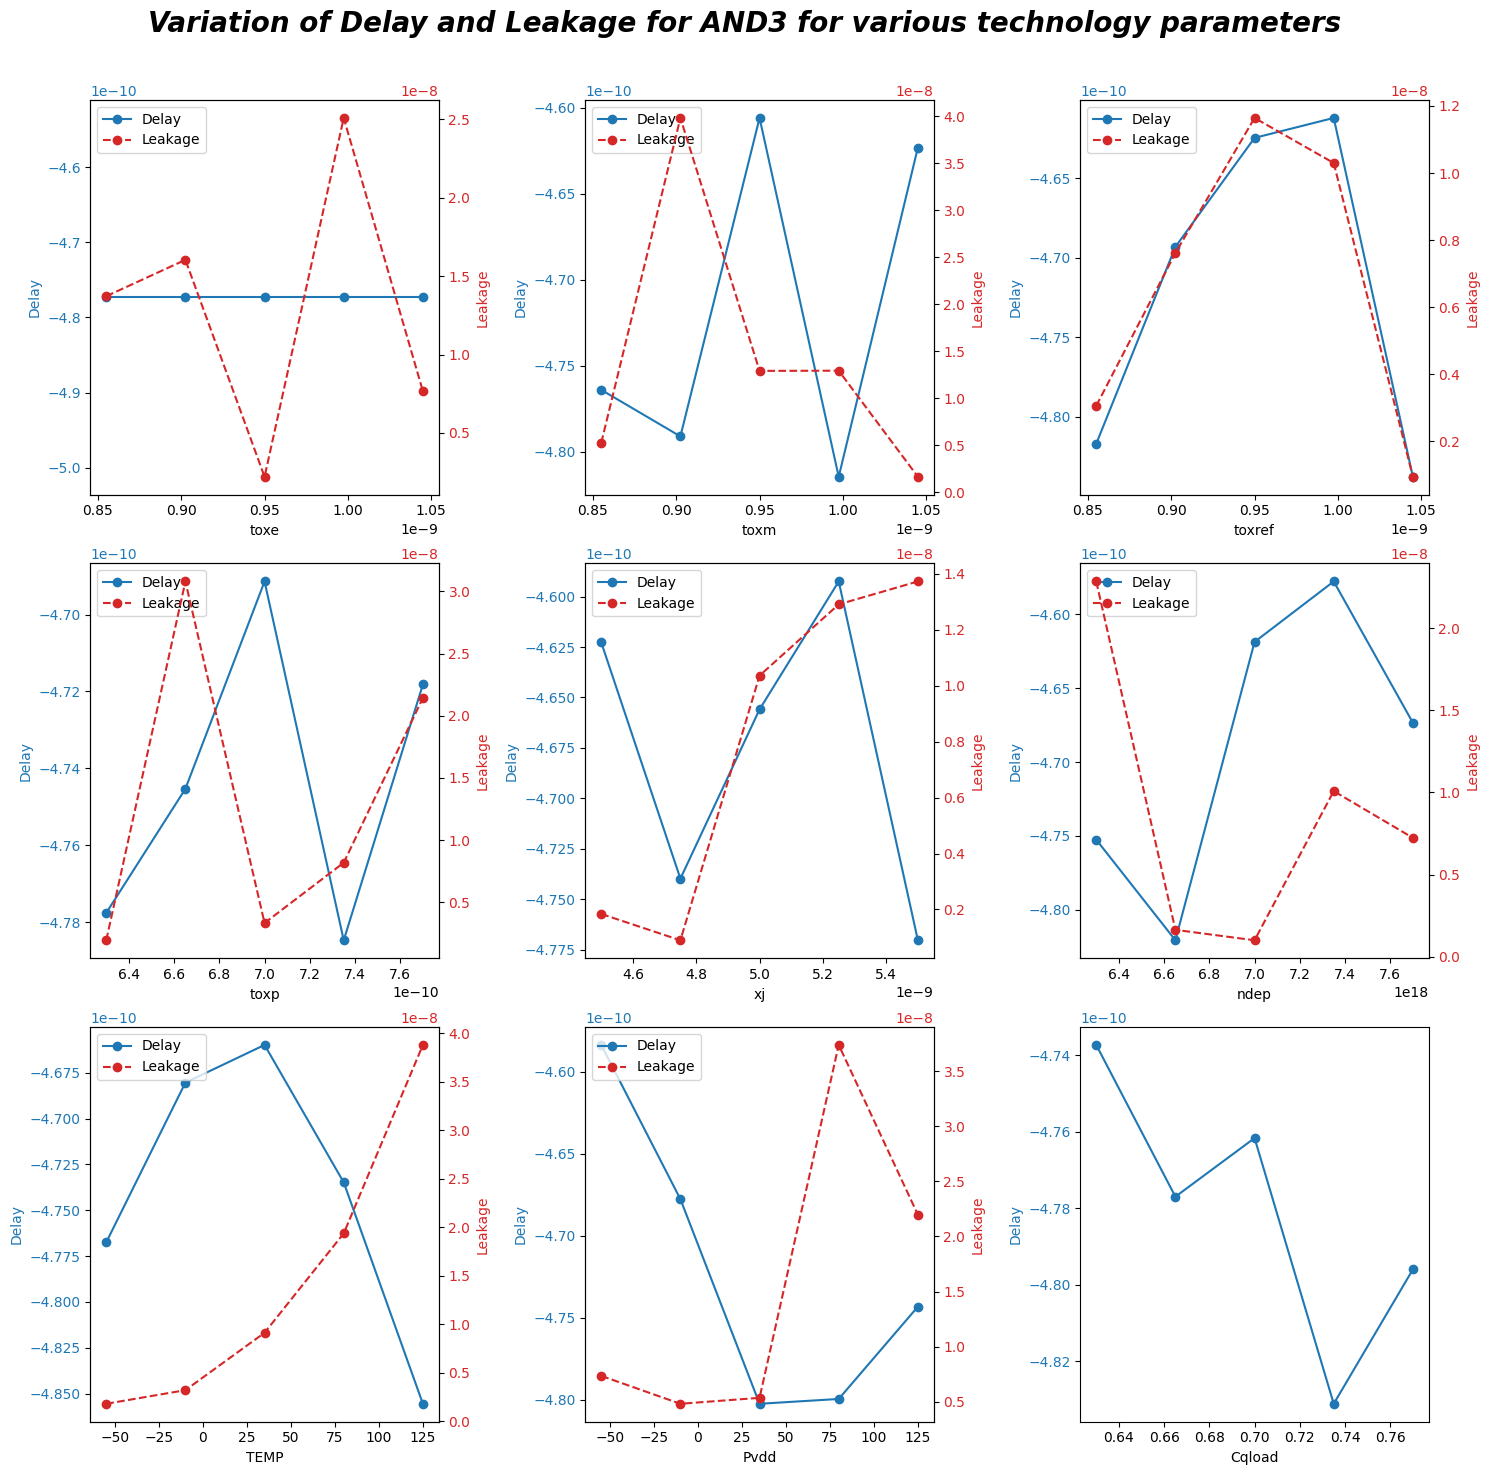

In [394]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data3 = [
    (axs[0, 0], toxe_list, delay_list_toxe, 'toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, delay_list_toxm, 'toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, delay_list_toxref, 'toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, delay_list_toxp, 'toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, delay_list_xj, 'xj', leakage_list_xj),
    (axs[1, 2], ndep_list, delay_list_ndep, 'ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, delay_list_temp, 'TEMP', leakage_list_temp),
    (axs[2, 1], temp_list, delay_list_pvdd, 'Pvdd', leakage_list_pvdd),
    (axs[2, 2], cqload_list, delay_list_cqload, 'Cqload', None)
]

for ax, x, param1, xlabel, param2 in data3:
    plot_dual_axis(ax, x, param1, xlabel, param2)

plt.tight_layout()
fig.suptitle('Variation of Delay and Leakage for AND3 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.savefig('Plots/16_nm_HP_AND3.png')
plt.show()


# 6. OR2

Loading the File path

In [395]:
file_path = "OR_2_leakage.csv"  # Provide the path to your CSV file
df_or2_leakage = pd.read_csv(file_path)

In [396]:
file_path = "AND_3_delay.csv"  # Provide the path to your CSV file
df_or2_delay = pd.read_csv(file_path)

## 6.1 Temparature

In [397]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_or2_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)

## Delay List
target_column = 'delay_nodea'
delay_list_temp = nearest_values_average(df_or2_delay, temp_list, column_name,target_column)
print(delay_list_temp)

[5.2847339213848855e-09, 6.836298537500636e-09, 2.60976340871149e-08, 4.240642780111542e-08, 8.661443696734593e-08]
[-4.767517000000001e-10, -4.680419000000001e-10, -4.659864e-10, -4.73482885e-10, -4.85557415e-10]


## 6.2 Pvdd

In [398]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_or2_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)

## Delay List
target_column = 'delay_nodea'
delay_list_pvdd = nearest_values_average(df_or2_delay, pvdd_list, column_name,target_column)
print(delay_list_pvdd)

[1.6067332685786793e-08, 1.5244315070033123e-08, 1.1022669880062253e-08, 7.599217919058129e-08, 6.247831810332558e-08]
[-4.5834999e-10, -4.6775818e-10, -4.802427100000001e-10, -4.799489199999998e-10, -4.7431838e-10]


## 6.3 Cqload

In [399]:
## Leakage List
column_name = 'Cqload'  # Specify the column name

## Delay List
target_column = 'delay_nodea'
delay_list_cqload = nearest_values_average(df_or2_delay, cqload_list, column_name,target_column)
print(delay_list_cqload)

[-4.737302949999998e-10, -4.7769981e-10, -4.7616681e-10, -4.831166199999998e-10, -4.796017799999998e-10]


## 6.4 toxe

In [400]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_or2_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)

## Delay List
target_column = 'delay_nodea'
delay_list_toxe = nearest_values_average(df_or2_delay, pvdd_list, column_name,target_column)
print(delay_list_toxe)

[3.8589564352105114e-08, 4.172109592703679e-08, 6.6673384303988145e-09, 7.208686567324872e-08, 2.166577043774586e-08]
[-4.7733651e-10, -4.7733651e-10, -4.7733651e-10, -4.7733651e-10, -4.7733651e-10]


## 6.5 toxm

In [401]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_or2_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)

## Delay List
target_column = 'delay_nodea'
delay_list_toxm = nearest_values_average(df_or2_delay, toxm_list, column_name,target_column)
print(delay_list_toxm)

[1.0214712494557208e-08, 7.294808412573893e-08, 2.9239985176648438e-08, 2.6774810058692123e-08, 3.8923523614485255e-09]
[-4.7641358e-10, -4.79120185e-10, -4.6059288999999996e-10, -4.8147049e-10, -4.6231412e-10]


## 6.6 toxref

In [402]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_or2_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)

## Delay List
target_column = 'delay_nodea'
delay_list_toxref = nearest_values_average(df_or2_delay, toxref_list, column_name,target_column)
print(delay_list_toxref)

[6.806996068765817e-09, 2.145345351699513e-08, 3.815890619091089e-08, 2.3959079409424795e-08, 2.9782591734490117e-09]
[-4.8168489e-10, -4.6931438e-10, -4.6246518e-10, -4.61213315e-10, -4.83757885e-10]


## 6.7 toxp

In [403]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_or2_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)

## Delay List
target_column = 'delay_nodea'
delay_list_toxp = nearest_values_average(df_or2_delay, toxp_par_list, column_name,target_column)
print(delay_list_toxp)

[4.937307281653455e-09, 6.304820073357095e-08, 7.046105095233851e-09, 2.4340877009338293e-08, 6.087342792976872e-08]
[-4.777597800000001e-10, -4.74531185e-10, -4.691384150000001e-10, -4.784705e-10, -4.718185e-10]


## 6.8 xj

In [404]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_or2_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)

## Delay List
target_column = 'delay_nodea'
delay_list_xj = nearest_values_average(df_or2_delay, xj_list, column_name,target_column)
print(delay_list_xj)

[5.4659245321530306e-09, 2.303405626293918e-09, 2.341367752352575e-08, 3.118967008656357e-08, 3.76289977914196e-08]
[-4.6226981999999997e-10, -4.7397608e-10, -4.655892899999999e-10, -4.59249695e-10, -4.770300950000001e-10]


## 6.9 ndep

In [405]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_or2_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)

## Delay List
target_column = 'delay_nodea'
delay_list_ndep = nearest_values_average(df_or2_delay, ndep_list, column_name,target_column)
print(delay_list_ndep)

[4.757195322585175e-08, 4.800883480976522e-09, 2.494002948171499e-09, 2.2677639159455018e-08, 2.2487492015013215e-08]
[-4.7525469e-10, -4.82062585e-10, -4.61875875e-10, -4.57783005e-10, -4.67346315e-10]


## 6.10 Plotting all plots

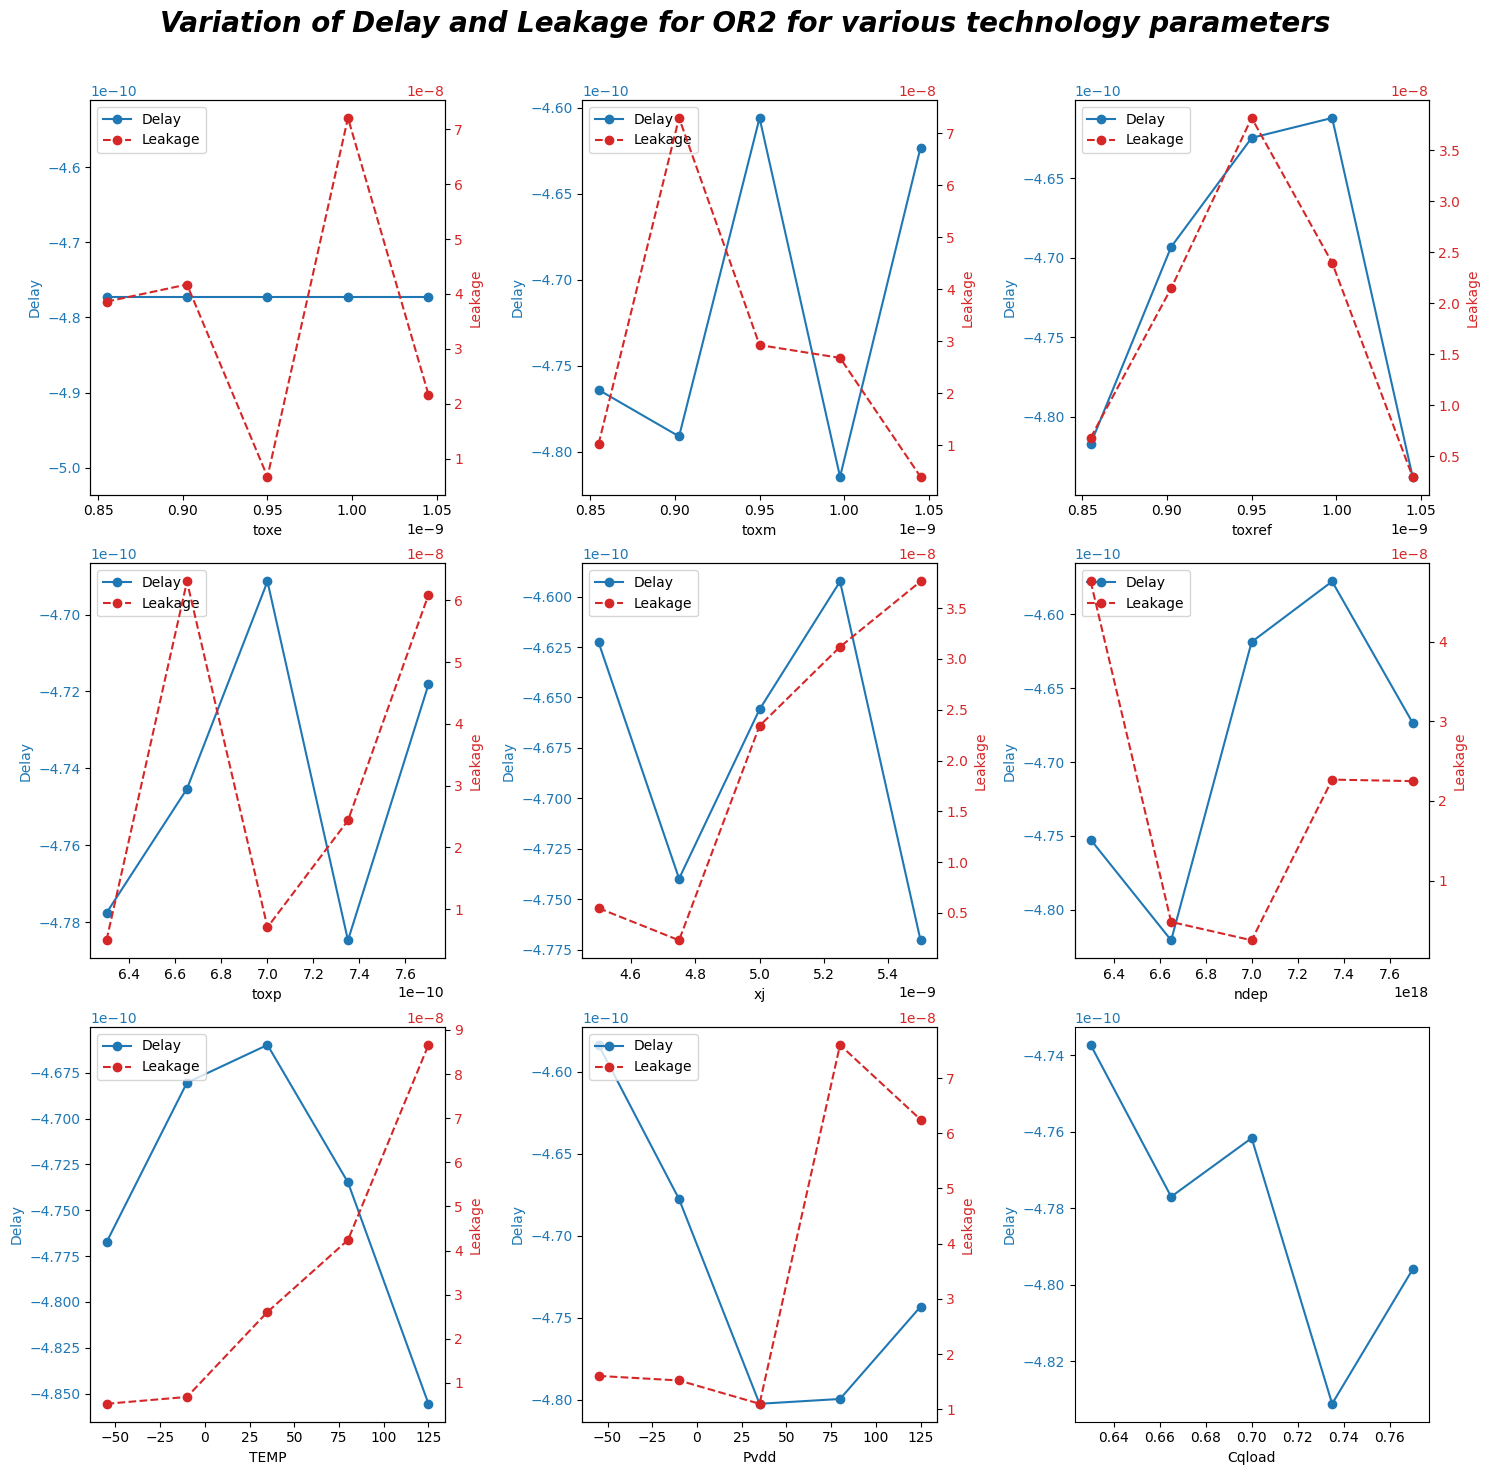

In [406]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data4 = [
    (axs[0, 0], toxe_list, delay_list_toxe, 'toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, delay_list_toxm, 'toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, delay_list_toxref, 'toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, delay_list_toxp, 'toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, delay_list_xj, 'xj', leakage_list_xj),
    (axs[1, 2], ndep_list, delay_list_ndep, 'ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, delay_list_temp, 'TEMP', leakage_list_temp),
    (axs[2, 1], temp_list, delay_list_pvdd, 'Pvdd', leakage_list_pvdd),
    (axs[2, 2], cqload_list, delay_list_cqload, 'Cqload', None)
]

for ax, x, param1, xlabel, param2 in data4:
    plot_dual_axis(ax, x, param1, xlabel, param2)

plt.tight_layout()
fig.suptitle('Variation of Delay and Leakage for OR2 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.savefig('Plots/16_nm_HP_OR2.png')
plt.show()


# 7. XOR

Loading the File path

In [407]:
file_path = "OR_2_leakage.csv"  # Provide the path to your CSV file
df_xor_leakage = pd.read_csv(file_path)

In [408]:
file_path = "AND_3_delay.csv"  # Provide the path to your CSV file
df_xor_delay = pd.read_csv(file_path)

## 7.1 Temparature

In [409]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_xor_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)

## Delay List
target_column = 'delay_nodea'
delay_list_temp = nearest_values_average(df_xor_delay, temp_list, column_name,target_column)
print(delay_list_temp)

[5.2847339213848855e-09, 6.836298537500636e-09, 2.60976340871149e-08, 4.240642780111542e-08, 8.661443696734593e-08]
[-4.767517000000001e-10, -4.680419000000001e-10, -4.659864e-10, -4.73482885e-10, -4.85557415e-10]


## 7.2 Pvdd

In [410]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_xor_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)

## Delay List
target_column = 'delay_nodea'
delay_list_pvdd = nearest_values_average(df_xor_delay, pvdd_list, column_name,target_column)
print(delay_list_pvdd)

[1.6067332685786793e-08, 1.5244315070033123e-08, 1.1022669880062253e-08, 7.599217919058129e-08, 6.247831810332558e-08]
[-4.5834999e-10, -4.6775818e-10, -4.802427100000001e-10, -4.799489199999998e-10, -4.7431838e-10]


## 7.3 Cqload

In [411]:
## Leakage List
column_name = 'Cqload'  # Specify the column name

## Delay List
target_column = 'delay_nodea'
delay_list_cqload = nearest_values_average(df_xor_delay, cqload_list, column_name,target_column)
print(delay_list_cqload)

[-4.737302949999998e-10, -4.7769981e-10, -4.7616681e-10, -4.831166199999998e-10, -4.796017799999998e-10]


## 7.4 toxe

In [412]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_xor_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)

## Delay List
target_column = 'delay_nodea'
delay_list_toxe = nearest_values_average(df_xor_delay, pvdd_list, column_name,target_column)
print(delay_list_toxe)

[3.8589564352105114e-08, 4.172109592703679e-08, 6.6673384303988145e-09, 7.208686567324872e-08, 2.166577043774586e-08]
[-4.7733651e-10, -4.7733651e-10, -4.7733651e-10, -4.7733651e-10, -4.7733651e-10]


## 7.5 toxm

In [413]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_xor_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)

## Delay List
target_column = 'delay_nodea'
delay_list_toxm = nearest_values_average(df_xor_delay, toxm_list, column_name,target_column)
print(delay_list_toxm)

[1.0214712494557208e-08, 7.294808412573893e-08, 2.9239985176648438e-08, 2.6774810058692123e-08, 3.8923523614485255e-09]
[-4.7641358e-10, -4.79120185e-10, -4.6059288999999996e-10, -4.8147049e-10, -4.6231412e-10]


## 7.6 toxref

In [414]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_xor_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)

## Delay List
target_column = 'delay_nodea'
delay_list_toxref = nearest_values_average(df_xor_delay, toxref_list, column_name,target_column)
print(delay_list_toxref)

[6.806996068765817e-09, 2.145345351699513e-08, 3.815890619091089e-08, 2.3959079409424795e-08, 2.9782591734490117e-09]
[-4.8168489e-10, -4.6931438e-10, -4.6246518e-10, -4.61213315e-10, -4.83757885e-10]


## 7.7 toxp

In [415]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_xor_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)

## Delay List
target_column = 'delay_nodea'
delay_list_toxp = nearest_values_average(df_xor_delay, toxp_par_list, column_name,target_column)
print(delay_list_toxp)

[4.937307281653455e-09, 6.304820073357095e-08, 7.046105095233851e-09, 2.4340877009338293e-08, 6.087342792976872e-08]
[-4.777597800000001e-10, -4.74531185e-10, -4.691384150000001e-10, -4.784705e-10, -4.718185e-10]


## 7.8 xj

In [416]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_xor_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)

## Delay List
target_column = 'delay_nodea'
delay_list_xj = nearest_values_average(df_xor_delay, xj_list, column_name,target_column)
print(delay_list_xj)

[5.4659245321530306e-09, 2.303405626293918e-09, 2.341367752352575e-08, 3.118967008656357e-08, 3.76289977914196e-08]
[-4.6226981999999997e-10, -4.7397608e-10, -4.655892899999999e-10, -4.59249695e-10, -4.770300950000001e-10]


## 7.9 ndep

In [417]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_xor_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)

## Delay List
target_column = 'delay_nodea'
delay_list_ndep = nearest_values_average(df_xor_delay, ndep_list, column_name,target_column)
print(delay_list_ndep)

[4.757195322585175e-08, 4.800883480976522e-09, 2.494002948171499e-09, 2.2677639159455018e-08, 2.2487492015013215e-08]
[-4.7525469e-10, -4.82062585e-10, -4.61875875e-10, -4.57783005e-10, -4.67346315e-10]


## 7.10 Plotting all plots

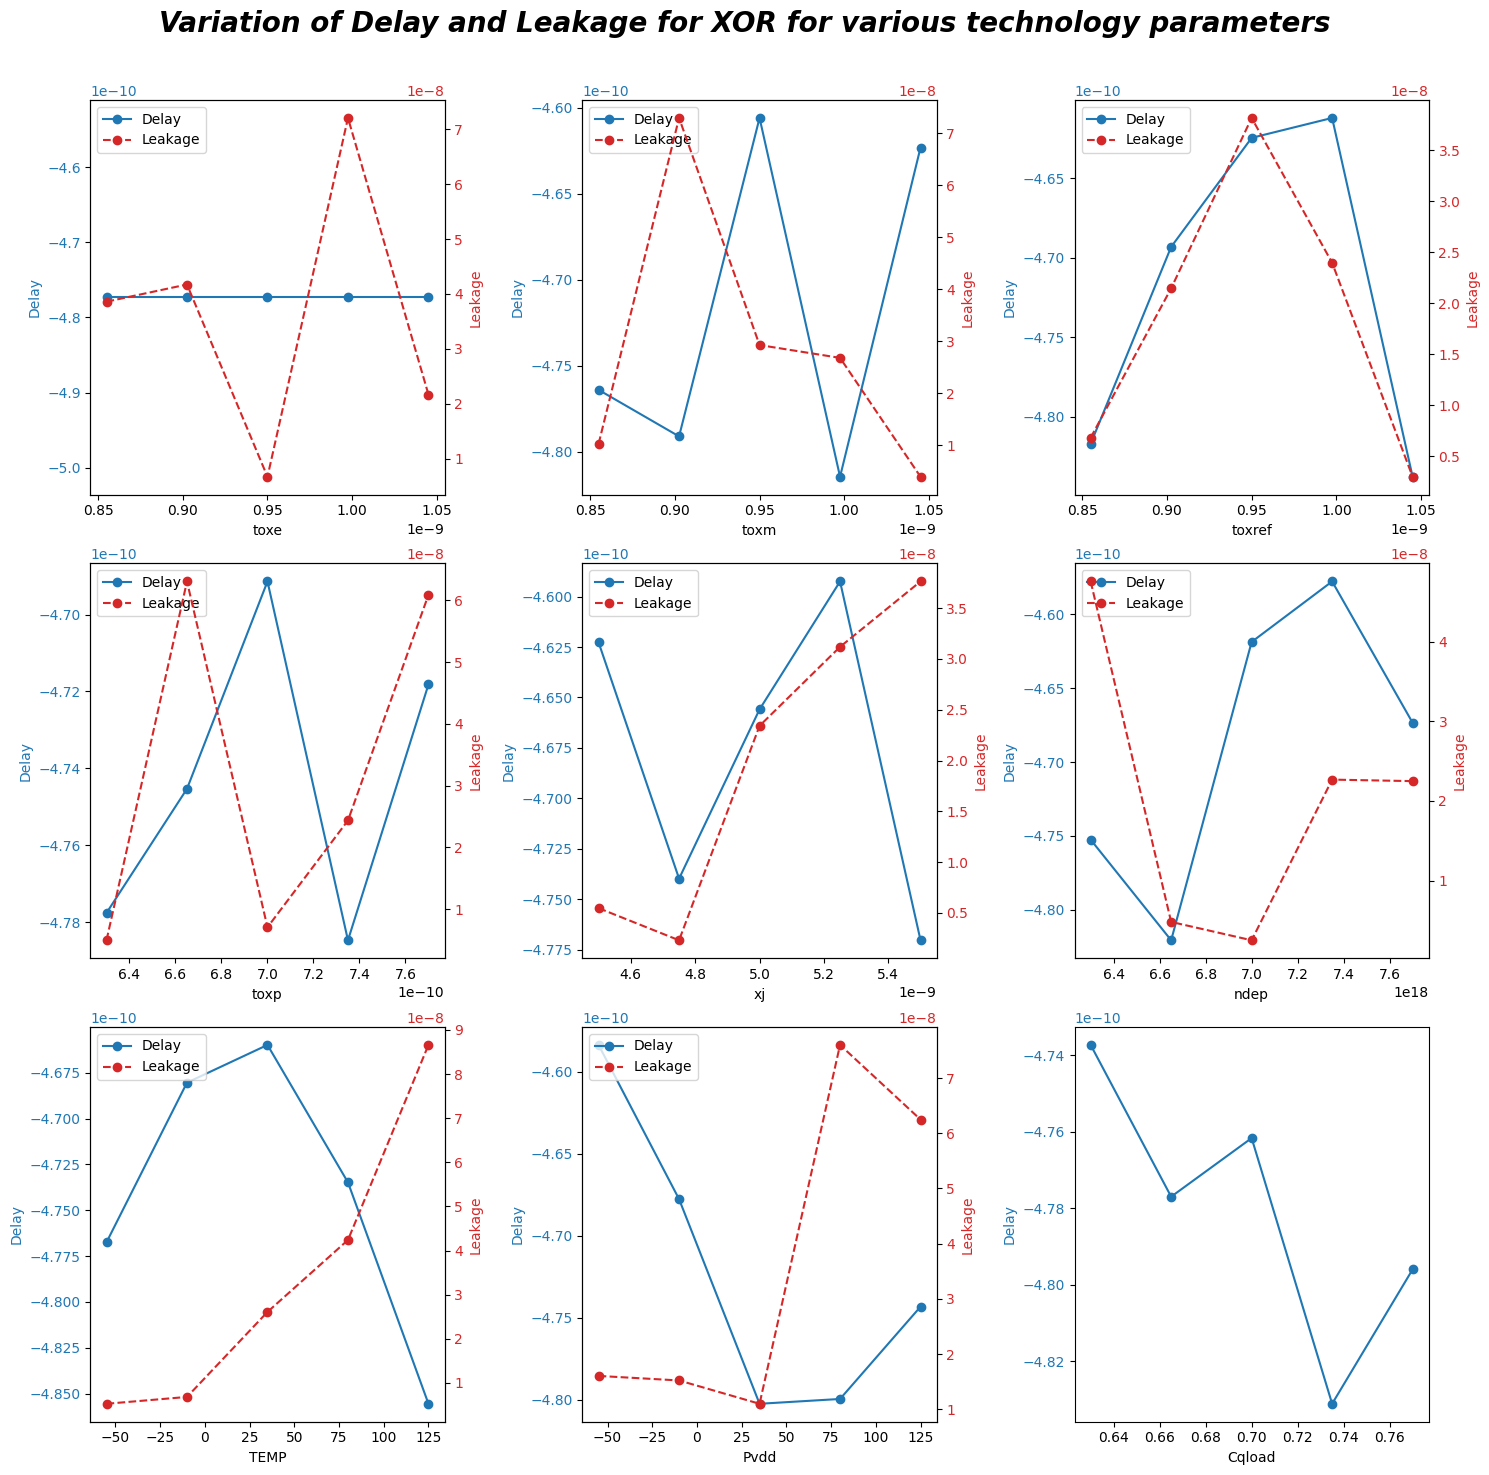

In [418]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data5 = [
    (axs[0, 0], toxe_list, delay_list_toxe, 'toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, delay_list_toxm, 'toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, delay_list_toxref, 'toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, delay_list_toxp, 'toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, delay_list_xj, 'xj', leakage_list_xj),
    (axs[1, 2], ndep_list, delay_list_ndep, 'ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, delay_list_temp, 'TEMP', leakage_list_temp),
    (axs[2, 1], temp_list, delay_list_pvdd, 'Pvdd', leakage_list_pvdd),
    (axs[2, 2], cqload_list, delay_list_cqload, 'Cqload', None)
]

for ax, x, param1, xlabel, param2 in data5:
    plot_dual_axis(ax, x, param1, xlabel, param2)

plt.tight_layout()
fig.suptitle('Variation of Delay and Leakage for XOR for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.savefig('Plots/16_nm_HP_XOR.png')
plt.show()
